# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [2]:
# student 1: Nir 6277
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Bringing the relevant CSVs
housing_test = pd.read_csv('housing_test.csv')
housing_train = pd.read_csv('housing_train.csv')

Text(784.1881313131312, 0.5, 'Latitude')

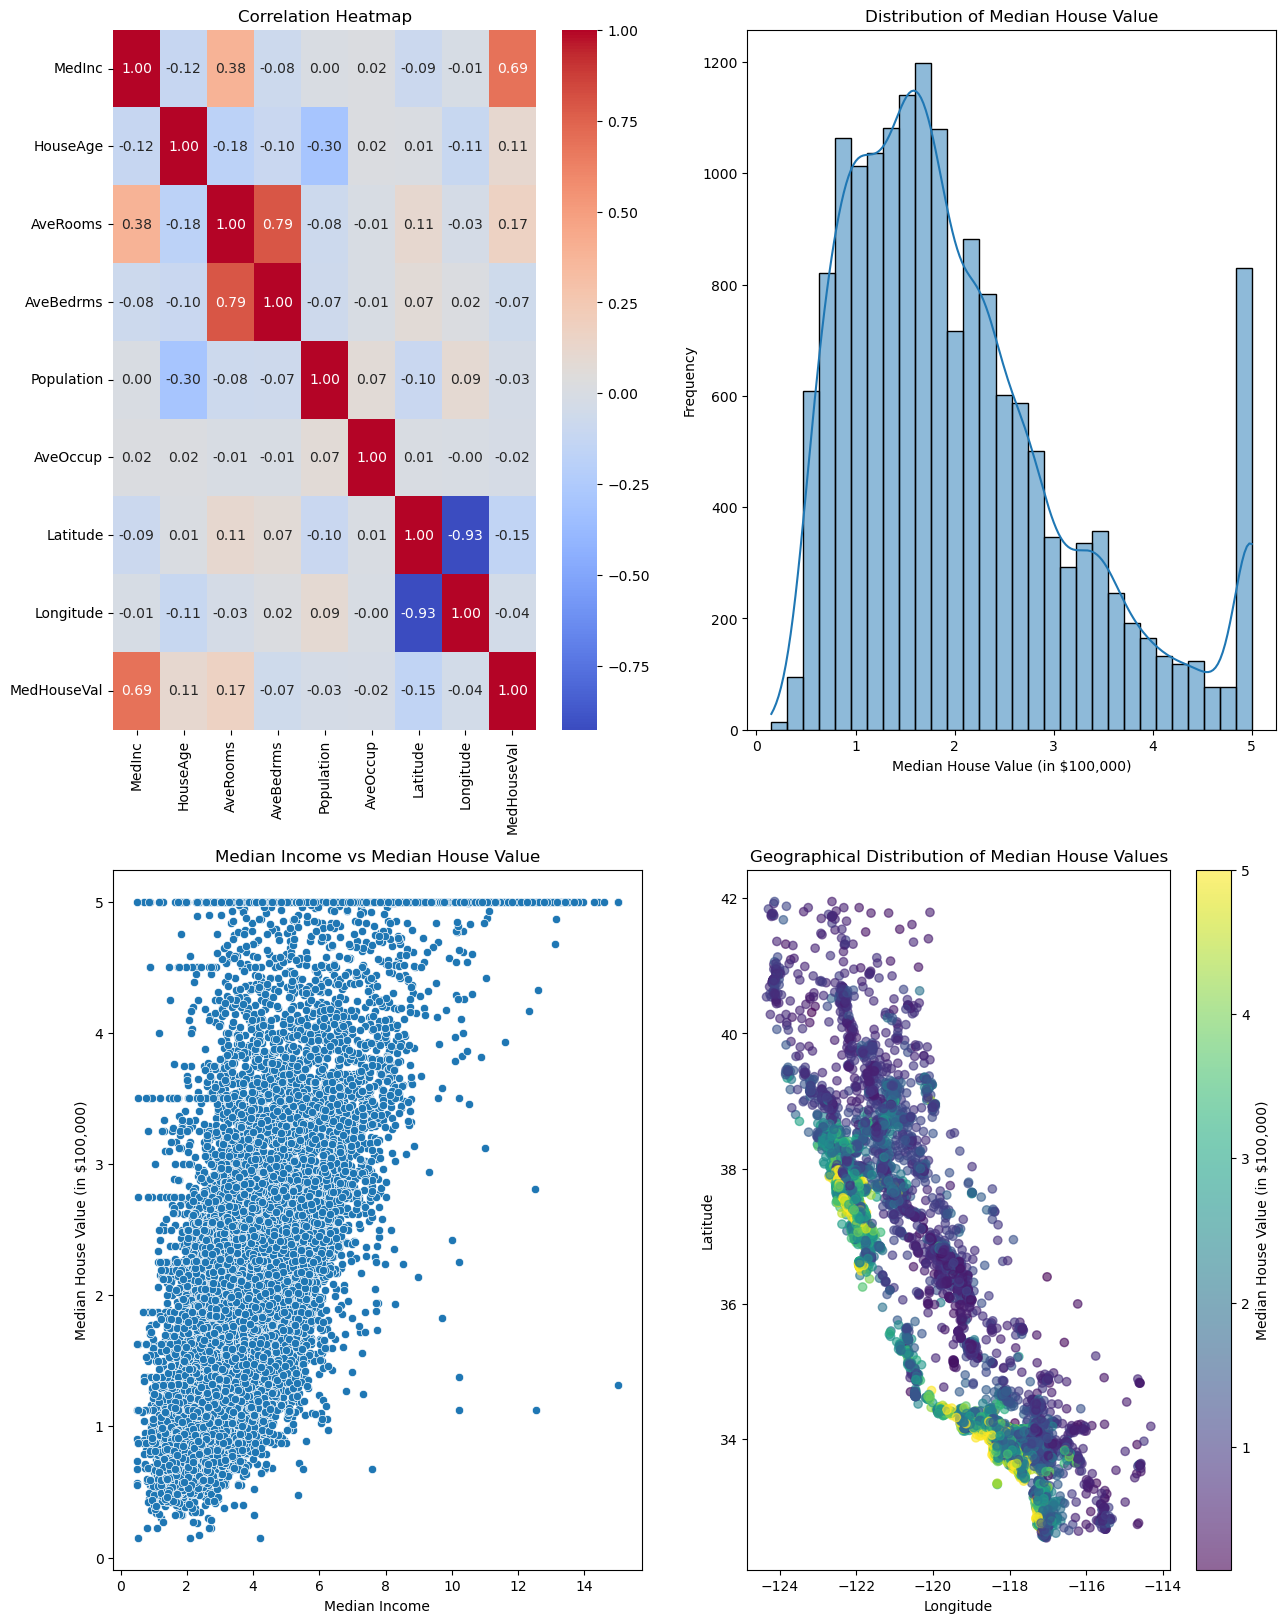

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 20))
plt.sca(axes[0, 0])
correlation_matrix = housing_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0, 0])
axes[0, 0].set_title('Correlation Heatmap')
plt.sca(axes[0, 1])
sns.histplot(housing_train['MedHouseVal'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Median House Value')
axes[0, 1].set_xlabel('Median House Value (in $100,000)')
axes[0, 1].set_ylabel('Frequency')
plt.sca(axes[1, 0])
sns.scatterplot(x='MedInc', y='MedHouseVal', data=housing_train, ax=axes[1, 0])
axes[1, 0].set_title('Median Income vs Median House Value')
axes[1, 0].set_xlabel('Median Income')
axes[1, 0].set_ylabel('Median House Value (in $100,000)')
plt.sca(axes[1, 1])
scatter = axes[1, 1].scatter(housing_train['Longitude'], housing_train['Latitude'], 
                              c=housing_train['MedHouseVal'], cmap='viridis', alpha=0.6)
fig.colorbar(scatter, ax=axes[1, 1], label='Median House Value (in $100,000)')
axes[1, 1].set_title('Geographical Distribution of Median House Values')
axes[1, 1].set_xlabel('Longitude')
axes[1, 1].set_ylabel('Latitude')

## Part 3 - Experiments
You could add as many code cells as needed

In [6]:
X_train = housing_train.drop(columns=['MedHouseVal'])
y_train = housing_train['MedHouseVal']
param_grid = {
    'fit_intercept': [True, False]
}
model = LinearRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")
best_model = grid_search.best_estimator_
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['params', 'mean_test_score']])

Best parameters: {'fit_intercept': True}
Best cross-validation score: 0.604823802322104
                     params  mean_test_score
0   {'fit_intercept': True}         0.604824
1  {'fit_intercept': False}         0.546241


In [7]:
X_train = housing_train.drop(columns=['MedHouseVal'])
y_train = housing_train['MedHouseVal']
param_grid = {
    'alpha': [0,1,5,10,15,50,100,150,200,500,600,700,1000,1500,1600,1700,2000]
}
model = Ridge()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")
best_model = grid_search.best_estimator_
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['params', 'mean_test_score']])

Best parameters: {'alpha': 15}
Best cross-validation score: 0.6048978014109488
             params  mean_test_score
0      {'alpha': 0}         0.604824
1      {'alpha': 1}         0.604831
2      {'alpha': 5}         0.604855
3     {'alpha': 10}         0.604879
4     {'alpha': 15}         0.604898
5     {'alpha': 50}         0.604893
6    {'alpha': 100}         0.604617
7    {'alpha': 150}         0.604176
8    {'alpha': 200}         0.603656
9    {'alpha': 500}         0.600286
10   {'alpha': 600}         0.599211
11   {'alpha': 700}         0.598167
12  {'alpha': 1000}         0.595190
13  {'alpha': 1500}         0.590570
14  {'alpha': 1600}         0.589685
15  {'alpha': 1700}         0.588811
16  {'alpha': 2000}         0.586254


In [8]:
X_train = housing_train.drop(columns=['MedHouseVal'])
y_train = housing_train['MedHouseVal']
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30]
}
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")
best_model = grid_search.best_estimator_
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['params', 'mean_test_score']])

Best parameters: {'max_depth': 30, 'n_estimators': 200}
Best cross-validation score: 0.7997387947145121
                                   params  mean_test_score
0  {'max_depth': 10, 'n_estimators': 100}         0.775053
1  {'max_depth': 10, 'n_estimators': 200}         0.775794
2  {'max_depth': 20, 'n_estimators': 100}         0.798249
3  {'max_depth': 20, 'n_estimators': 200}         0.799533
4  {'max_depth': 30, 'n_estimators': 100}         0.798231
5  {'max_depth': 30, 'n_estimators': 200}         0.799739


In [9]:
X_train = housing_train.drop(columns=['MedHouseVal'])
X_train['RoomsPerOccup'] = housing_train['AveRooms'] / housing_train['AveOccup']
y_train = housing_train['MedHouseVal']

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30]
}
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")
best_model = grid_search.best_estimator_
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['params', 'mean_test_score']])

Best parameters: {'max_depth': 20, 'n_estimators': 200}
Best cross-validation score: 0.7990043143734848
                                   params  mean_test_score
0  {'max_depth': 10, 'n_estimators': 100}         0.774618
1  {'max_depth': 10, 'n_estimators': 200}         0.775538
2  {'max_depth': 20, 'n_estimators': 100}         0.797455
3  {'max_depth': 20, 'n_estimators': 200}         0.799004
4  {'max_depth': 30, 'n_estimators': 100}         0.797675
5  {'max_depth': 30, 'n_estimators': 200}         0.798582


In [11]:
X_train = housing_train.drop(columns=['MedHouseVal'])
y_train = housing_train['MedHouseVal']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30]
}
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")
best_model = grid_search.best_estimator_
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['params', 'mean_test_score']])

Best parameters: {'max_depth': 30, 'n_estimators': 200}
Best cross-validation score: 0.7989613030169376
                                   params  mean_test_score
0  {'max_depth': 10, 'n_estimators': 100}         0.775338
1  {'max_depth': 10, 'n_estimators': 200}         0.774745
2  {'max_depth': 20, 'n_estimators': 100}         0.797549
3  {'max_depth': 20, 'n_estimators': 200}         0.798418
4  {'max_depth': 30, 'n_estimators': 100}         0.797507
5  {'max_depth': 30, 'n_estimators': 200}         0.798961


R^2 score on validation set: 0.9722889809980542


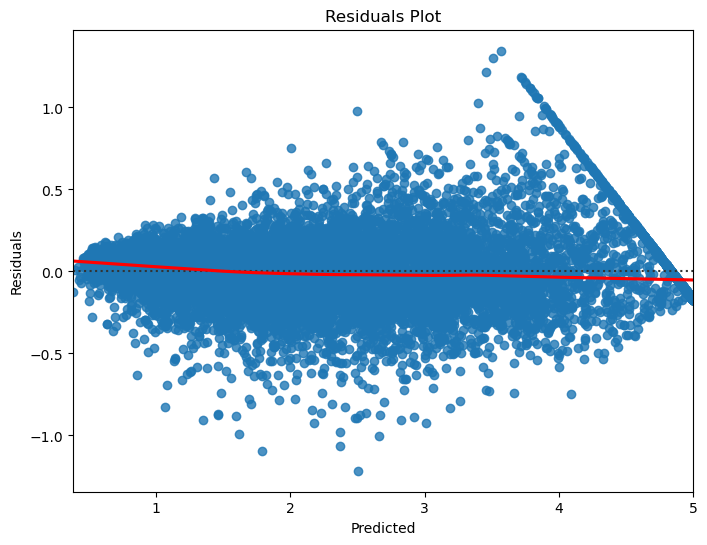

In [10]:
best_model.fit(X_train, y_train)
r2_score = best_model.score(X_train, y_train)
print(f'R^2 score on validation set: {r2_score}')
y_pred = best_model.predict(X_train)
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=y_train, lowess=True, line_kws=dict(color="r"))
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [13]:
X_train = housing_train.drop(columns=['MedHouseVal'])
y_train = housing_train['MedHouseVal']
best_model = RandomForestRegressor(n_estimators=200, max_depth=20)
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200)

## Part 5 - Apply on test and show model performance estimation

In [36]:
X_test = housing_test.drop(columns=['MedHouseVal'])
y_test = housing_test['MedHouseVal']
y_pred = best_model.predict(X_test)
r2_score = best_model.score(X_test, y_test)
error_rate = abs(y_pred - y_test)
y_df = pd.DataFrame({
    'y_actual': y_test,
    'y_pred': y_pred,
    'error_rate': error_rate
})
y_df.head()

,y_actual,y_pred,error_rate
0,3.852,3.309166,0.542834
1,2.457,2.464800,0.007800
2,2.013,2.639892,0.626892
3,1.052,1.127521,0.075521
4,1.078,1.184032,0.106032


In [37]:
print(r2_score)

0.8271905957440568


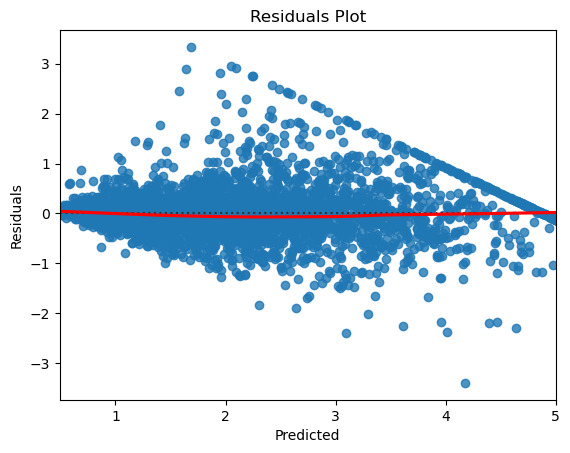

In [28]:
sns.residplot(x=y_pred, y=y_actual, lowess=True, line_kws=dict(color="r"))
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()